In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os

In [ ]:
! wget https://www.dropbox.com/sh/s9r1av3m4eatd3y/AAA8zYti5b5tnyKfcah2Reaja -O data

In [ ]:
!unzip data -d "images/"

In [ ]:
!pip install keras_preprocessing

In [6]:
classes = os.listdir('images/Train')
classes

['Charmander', 'Pikachu', 'Bulbasaur']

In [8]:
for pokemon_type in classes:
  path = "images/Train/" + pokemon_type
  print(f"{pokemon_type} - {len(os.listdir(path))}")

Charmander - 102
Pikachu - 101
Bulbasaur - 101


In [9]:
from keras_preprocessing import image

In [10]:
train_data = []
train_labels = []

In [12]:
for category in classes:
  folder = f"images/Train/{category}"
  for image_name in os.listdir(folder):
    img_path = os.path.join(folder, image_name)

    img = image.load_img(img_path, target_size=(100, 100))
    img_array = image.img_to_array(img)
    train_data.append(img_array)
    train_labels.append(category)


/usr/local/lib/python3.10/dist-packages/PIL/Image.py:975: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


In [13]:
len(train_data)

304

In [14]:
train_data = np.array(train_data)
train_labels = np.array(train_labels)

In [15]:
train_data = train_data.reshape(len(train_data), 30000)

In [16]:
train_data.shape

(304, 30000)

In [17]:
category2label = {'Pikachu': 0, 'Charmander':1, 'Bulbasaur':2}
label2category = {0:'Pikachu', 1:'Charmander', 2:'Bulbasaur'}

In [18]:
train_labels = np.array([category2label[label] for label in train_labels])

In [19]:
from keras.utils import to_categorical

In [20]:
train_labels = to_categorical(train_labels)

In [ ]:
train_labels

In [26]:
from keras.layers import Dense
from keras import Sequential

In [28]:
features = train_data.shape[1]

In [29]:
model = Sequential()

In [30]:
model.add(Dense(units=512, activation= 'relu', input_shape=(features,)))

In [35]:
model.add(Dense(units=256, activation= 'relu'))

In [32]:
model.add(Dense(units=128, activation= 'relu'))

In [33]:
model.add(Dense(units=64, activation= 'relu'))

In [34]:
model.add(Dense(units=3, activation= 'softmax'))

In [42]:

model.compile(optimizer = "adam", loss="categorical_crossentropy", metrics=['accuracy'])

In [43]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_6 (Dense)             (None, 512)               15360512  
                                                                 
 dense_7 (Dense)             (None, 256)               131328    
                                                                 
 dense_8 (Dense)             (None, 128)               32896     
                                                                 
 dense_9 (Dense)             (None, 64)                8256      
                                                                 
 dense_10 (Dense)            (None, 3)                 195       
                                                                 
Total params: 15,533,187
Trainable params: 15,533,187
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model.fit(train_data, train_labels, batch_size=32, epochs = 50)

In [54]:
test_image = "/content/2438704-1202149925_t.png"

img = image.load_img(test_image, target_size = (100, 100))
img = image.img_to_array(img)
img.shape

(100, 100, 3)

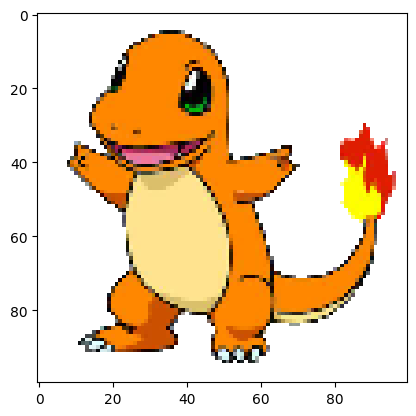

In [55]:
plt.imshow(img.astype('int'))

In [56]:
img = img.reshape(1, 30000)

In [57]:
model.predict(img).argmax()

1/1 [==============================] - 0s 33ms/step


1

In [58]:
pred = label2category[model.predict(img).argmax()]
pred

1/1 [==============================] - 0s 28ms/step


'Charmander'